In [57]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
from google.colab import files
uploaded = files.upload()

Saving used_cars.csv to used_cars (1).csv


In [3]:
# Loading data
df = pd.read_csv('used_cars.csv')
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [4]:
df.shape

(4009, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [6]:
# Checking for null values
df.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,170
engine,0
transmission,0
ext_col,0
int_col,0
accident,113


In [7]:
# Filling null values in fuel_type using mode
df['fuel_type'].fillna(df['fuel_type'].mode()[0],inplace=True)

In [8]:
df['accident'].unique()

array(['At least 1 accident or damage reported', 'None reported', nan],
      dtype=object)

In [9]:
# filling null values in accident as 0 (zero)
df['accident'].fillna(0,inplace=True)
df['accident'] = df['accident'].replace({'At least 1 accident or damage reported':1,'None reported':0})
df['accident'].unique()

array([1, 0])

In [10]:
df['clean_title'].unique()

array(['Yes', nan], dtype=object)

In [11]:
# filling null values in clean_title as No
df['clean_title'].fillna(0,inplace=True)
df['clean_title'] = df['clean_title'].replace({'Yes':1})
df['clean_title'].unique()

array([1, 0])

In [12]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,1,1,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,1,1,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,0,0,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,0,1,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,0,0,"$34,999"


In [13]:
len(df.brand.unique())

57

In [14]:
len(df.model.unique())

1898

In [15]:
df.fuel_type.unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', 'Diesel', 'Plug-In Hybrid',
       '–', 'not supported'], dtype=object)

In [16]:
df[df.fuel_type == 'not supported']

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
2894,Toyota,Mirai Limited,2021,"44,000 mi.",not supported,182.0HP Electric Motor Hydrogen Fuel,A/T,Gray,Black,0,1,"$18,500"
3700,Toyota,Mirai Base,2016,"40,000 mi.",not supported,151.0HP Electric Motor Hydrogen Fuel,A/T,Silver,Black,0,1,"$9,500"


In [17]:
df["fuel_type"] = df["fuel_type"].replace("not supported", "Electric Motor Hydrogen Fuel")


In [18]:
df[df.fuel_type == 'E85 Flex Fuel']

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,1,1,"$10,300"
21,Chevrolet,S-10 LS,2000,"133,510 mi.",E85 Flex Fuel,120.0HP 2.2L 4 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Black,0,1,"$4,500"
29,Audi,Q5 2.0T Premium Plus,2017,"81,880 mi.",E85 Flex Fuel,2.0L I4 16V GDI DOHC Turbo Flexible Fuel,8-Speed Automatic,Mythos Black Metallic,Black,0,1,"$21,375"
40,Bentley,Continental GTC Base,2011,"20,200 mi.",E85 Flex Fuel,552.0HP 6.0L 12 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,0,1,"$79,950"
117,Ford,Utility Police Interceptor Base,2013,"105,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,A/T,White,Black,1,1,"$6,600"
...,...,...,...,...,...,...,...,...,...,...,...,...
3844,Ford,F-250 XL,2020,"36,000 mi.",E85 Flex Fuel,385.0HP 6.2L 8 Cylinder Engine Flex Fuel Capab...,A/T,White,Gray,0,1,"$44,000"
3862,Dodge,Grand Caravan SE,2018,"64,000 mi.",E85 Flex Fuel,283.0HP 3.6L V6 Cylinder Engine Flex Fuel Capa...,A/T,White,Gray,0,1,"$35,000"
3872,Ford,F-150 XLT,2016,"71,000 mi.",E85 Flex Fuel,385.0HP 5.0L 8 Cylinder Engine Flex Fuel Capab...,A/T,Black,–,1,1,"$24,350"
3953,Ford,Transit Connect XLT,2016,"111,700 mi.",E85 Flex Fuel,169.0HP 2.5L 4 Cylinder Engine Flex Fuel Capab...,A/T,White,Beige,0,1,"$15,500"


In [19]:
df[df.fuel_type == '–']

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
130,Chrysler,Pacifica Touring,2017,"87,305 mi.",–,–,9-Speed A/T,Silver,Black,0,1,"$9,000"
257,Toyota,Land Cruiser Base,1993,"231,500 mi.",–,–,A/T,White,Gray,0,1,"$29,500"
338,Mazda,Mazda3 s Grand Touring,2016,"85,000 mi.",–,–,A/T,Black,Black,1,1,"$18,500"
491,Chrysler,Pacifica Touring,2017,"63,000 mi.",–,–,9-Speed A/T,White,Beige,0,1,"$20,000"
692,Honda,Civic EX,1993,"58,981 mi.",–,–,A/T,White,Beige,0,1,"$9,599"
855,Ford,Bronco,1974,"6,217 mi.",–,–,–,Dark Gray Metallic,–,0,1,"$115,000"
923,Dodge,Challenger R/T,2010,"100,100 mi.",–,–,Transmission w/Dual Shift Mode,Purple,Black,0,1,"$17,000"
995,Dodge,Challenger R/T Scat Pack,2019,"43,000 mi.",–,–,6-Speed M/T,Green,Black,0,1,"$50,000"
1063,Mazda,Mazda6 i Grand Touring,2016,"83,100 mi.",–,–,A/T,White,White,0,1,"$17,800"
1083,Dodge,Challenger R/T,2010,"73,000 mi.",–,–,A/T,Black,Black,0,1,"$17,500"


**Bivariate analysis**

**(A) With numerical columns**

In [20]:
df.select_dtypes(include=['number']).columns


Index(['model_year', 'accident', 'clean_title'], dtype='object')

In [21]:
df.accident.unique()

array([1, 0])

In [22]:
# Found price column to be a string. Hence it had to be converted to float dtype
df["price"] = df["price"].replace("[\$,]", "", regex=True).astype(float)


In [23]:
df["milage"] = df["milage"].str.replace("[, mi.]", "", regex=True).astype(int)

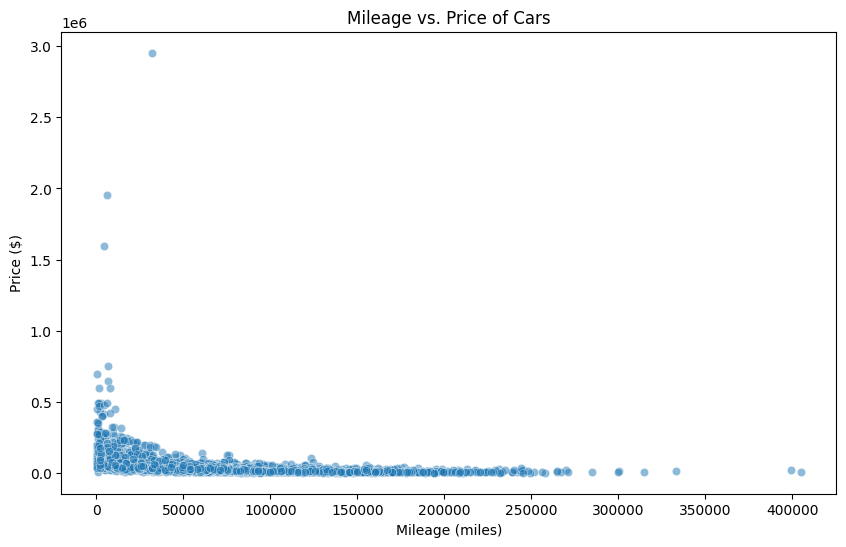

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["milage"], y=df["price"], alpha=0.5)
plt.title("Mileage vs. Price of Cars")
plt.xlabel("Mileage (miles)")
plt.ylabel("Price ($)")
plt.show()


In [25]:
df.dtypes

,0
brand,object
model,object
model_year,int64
milage,int64
fuel_type,object
engine,object
transmission,object
ext_col,object
int_col,object
accident,int64


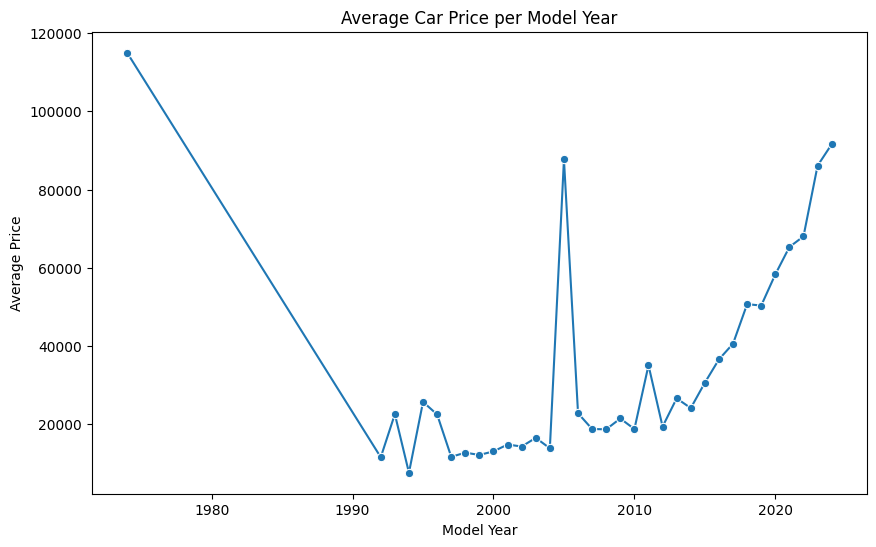

In [26]:
#Since the price column is continuous we are grouping it to have better visalization
df_grouped = df.groupby("model_year")["price"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=df_grouped["model_year"], y=df_grouped["price"], marker="o")
plt.title("Average Car Price per Model Year")
plt.xlabel("Model Year")
plt.ylabel("Average Price")
plt.show()


**Observation:**
1. There seems to be some kind of relationship between model year and car price.
2. Old models and new models are found to have high average car price.
3. We cannot see a clear relationship between milage and price.

**(B) With categorical variable**

In [27]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [28]:
categories = ['brand', 'model', 'fuel_type', 'engine','transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

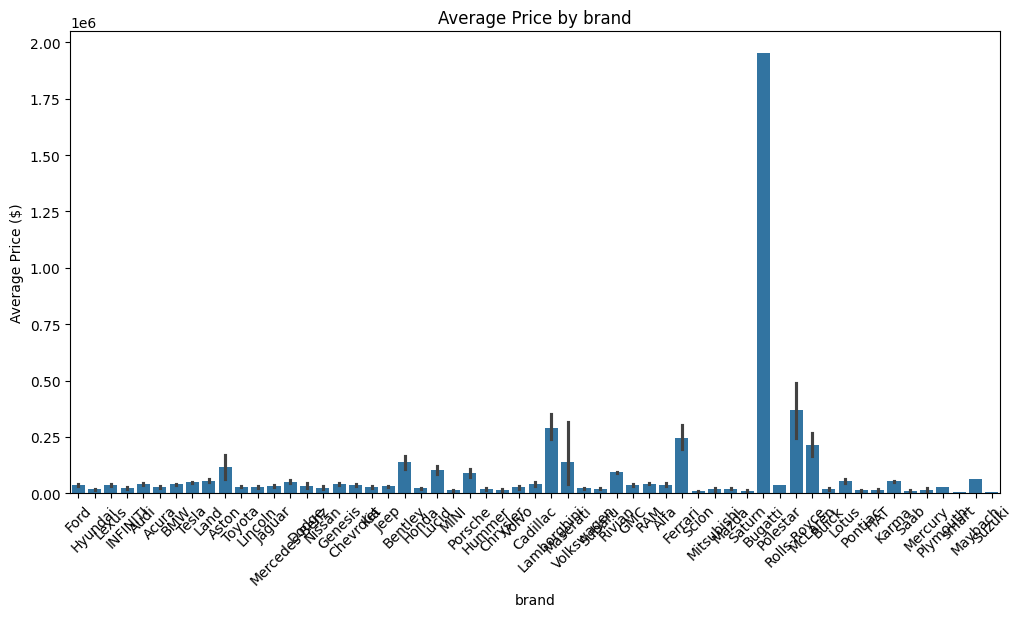

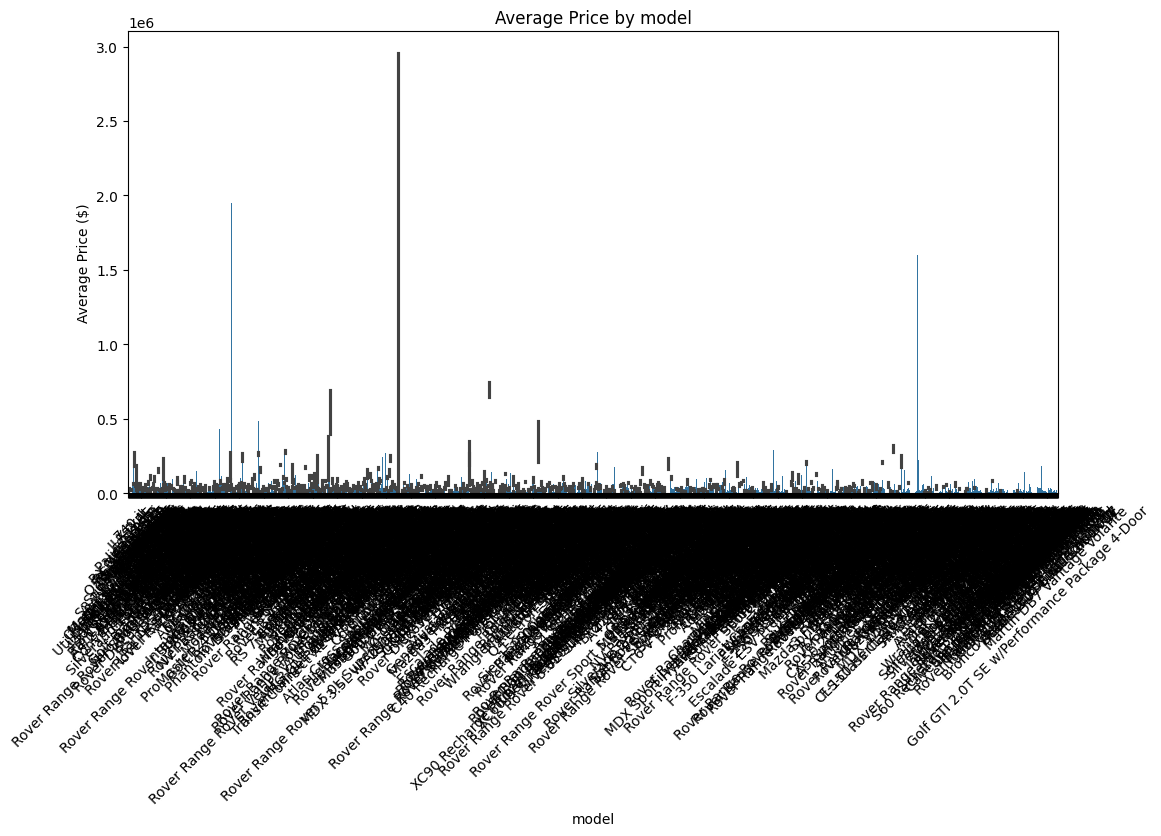

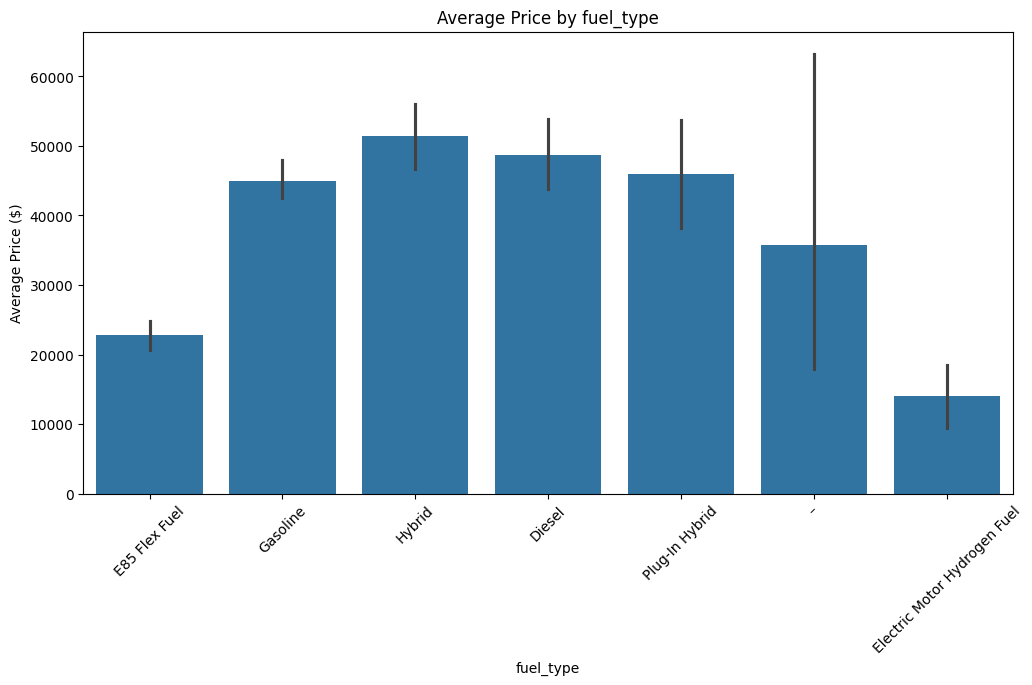

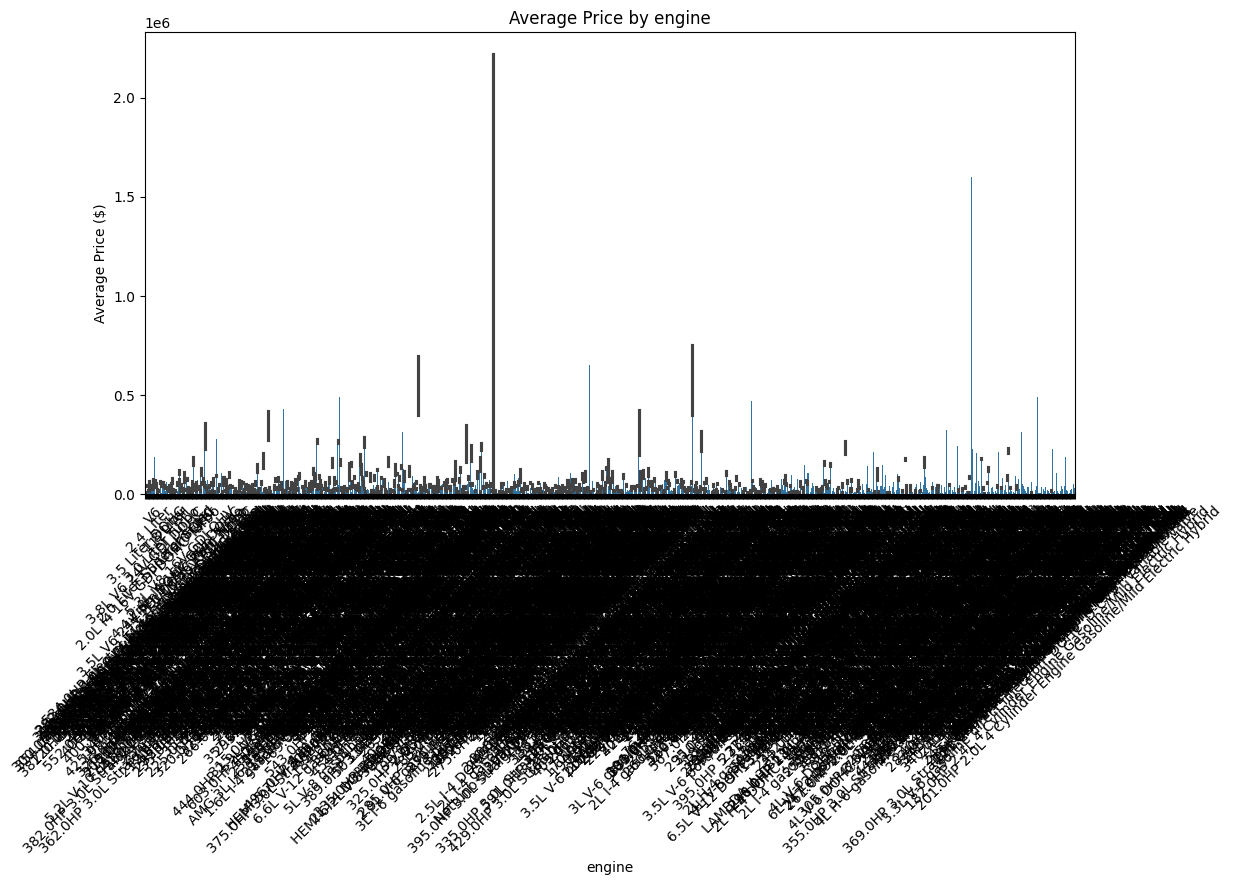

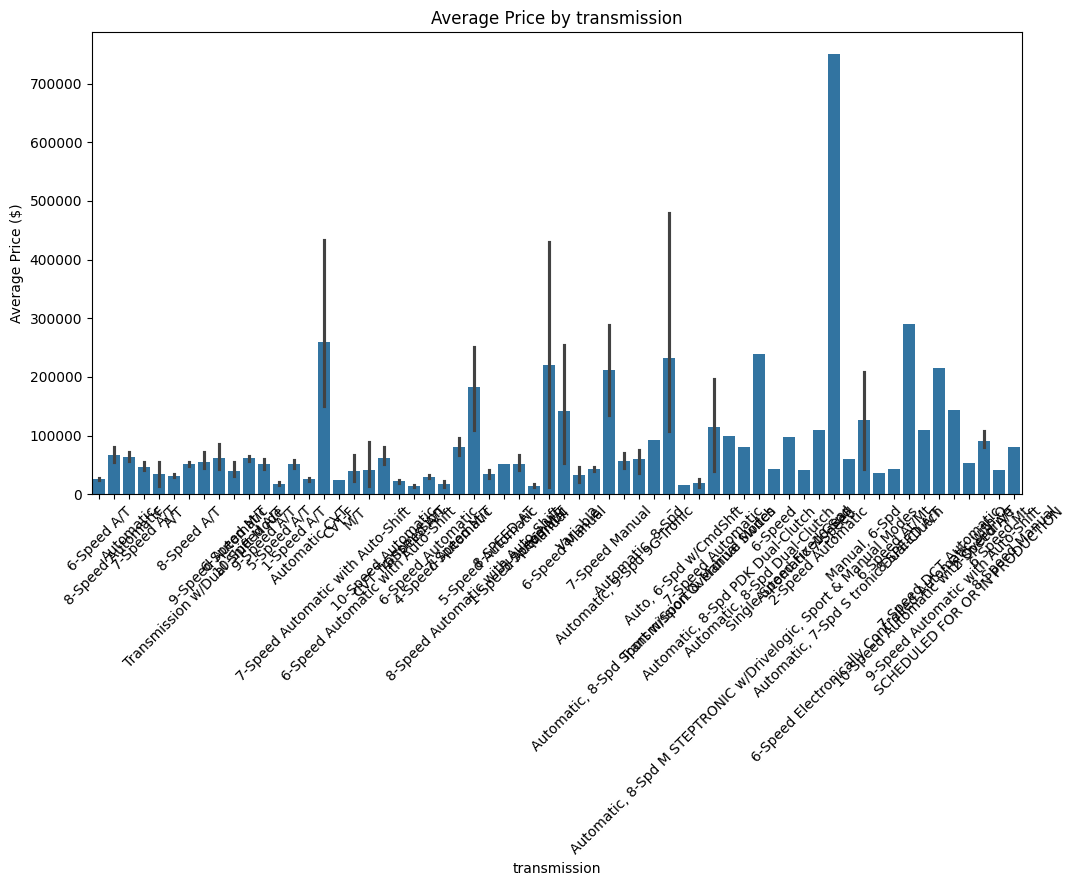

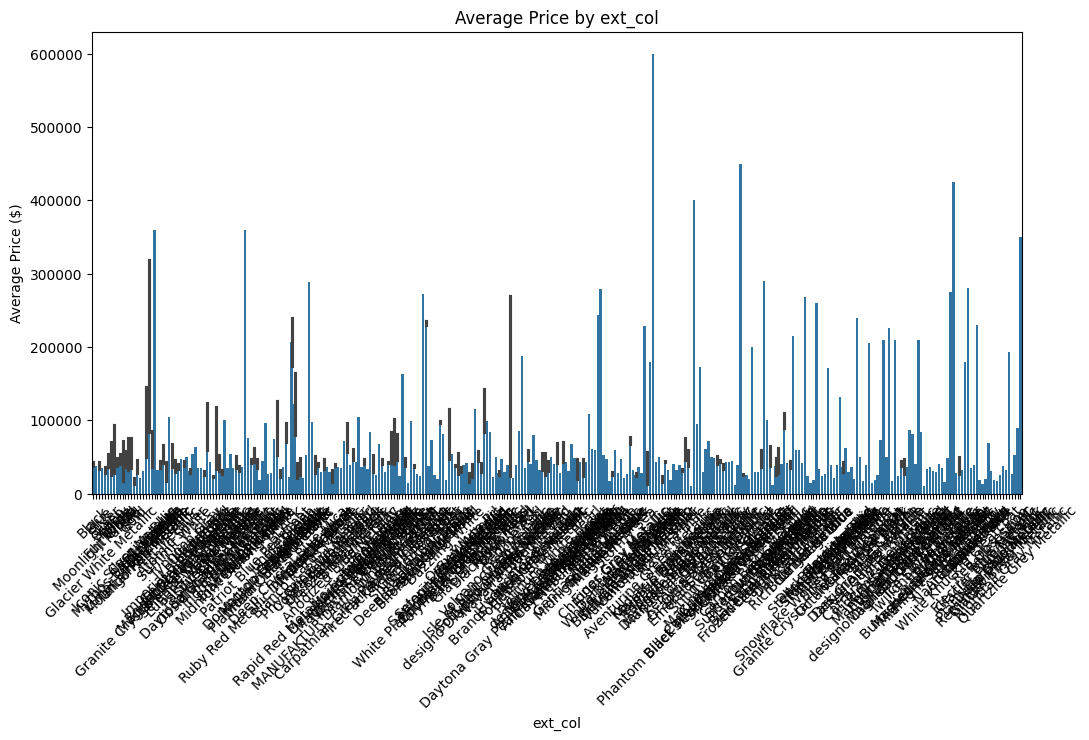

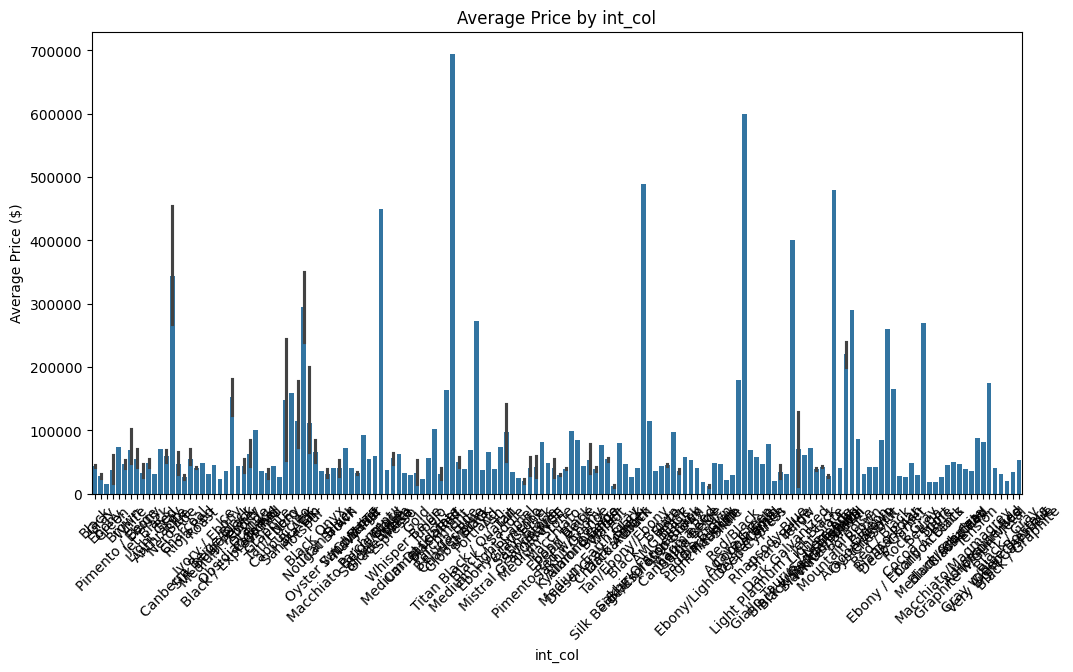

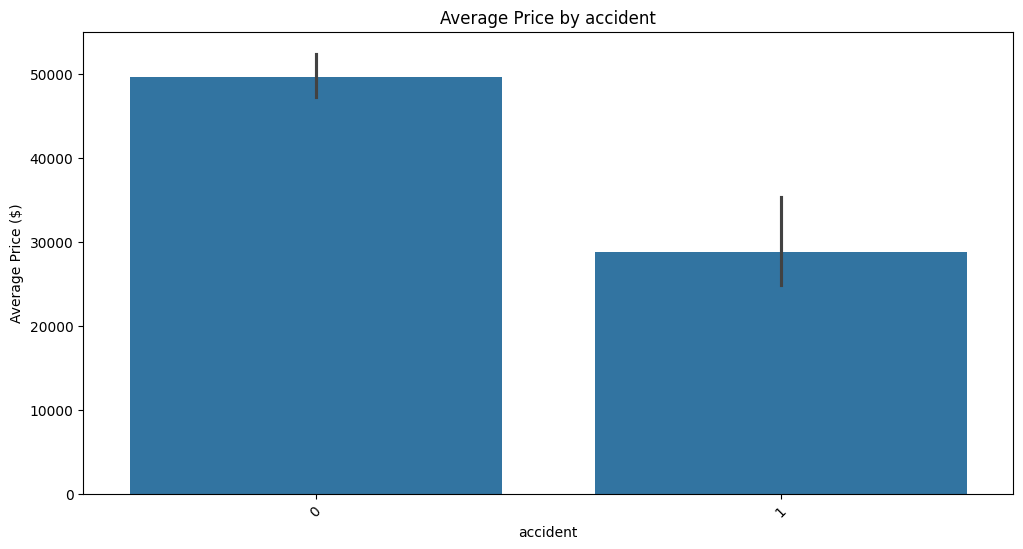

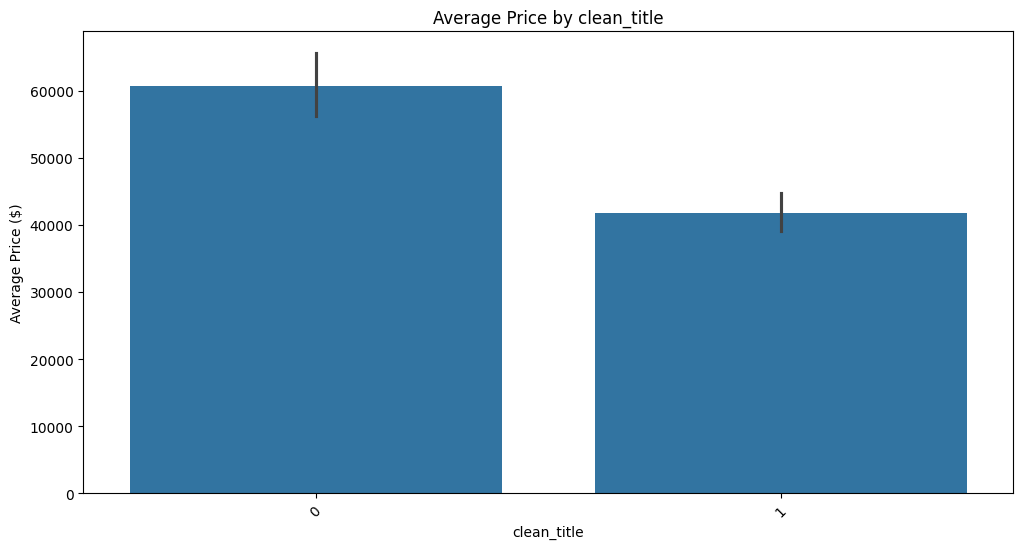

In [29]:
for col in categories:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=df[col], y=df["price"], estimator=np.mean)
    plt.title(f"Average Price by {col}")
    plt.xlabel(col)
    plt.ylabel("Average Price ($)")
    plt.xticks(rotation=45)
    plt.show()

**Observations:**
1. we can drop lot of columns which are complex and add less or no values for final prediction of car price.

In [30]:
# ANOVA analysis to check significance of categorical variables in predicting price
from scipy import stats

categorical_columns = ['brand','model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col']  # Replace with your columns

for col in categorical_columns:
    groups = [df[df[col] == category]["price"] for category in df[col].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"{col}: ANOVA F-stat={f_stat:.2f}, p-value={p_value:.4f}")


brand: ANOVA F-stat=38.53, p-value=0.0000
model: ANOVA F-stat=3.07, p-value=0.0000
fuel_type: ANOVA F-stat=2.25, p-value=0.0360
engine: ANOVA F-stat=5.30, p-value=0.0000
transmission: ANOVA F-stat=9.59, p-value=0.0000
ext_col: ANOVA F-stat=1.43, p-value=0.0000
int_col: ANOVA F-stat=3.79, p-value=0.0000


**Observation:**
1. fuel type,ext_col,int_col and model contribute less to varriance in price.



In [31]:
categories


['brand',
 'model',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title']

In [32]:
df.engine.nunique()

1146

In [33]:
df.transmission.unique()

array(['6-Speed A/T', '8-Speed Automatic', 'Automatic', '7-Speed A/T',
       'F', 'A/T', '8-Speed A/T', 'Transmission w/Dual Shift Mode',
       '9-Speed Automatic', '6-Speed M/T', '10-Speed A/T', '9-Speed A/T',
       '5-Speed A/T', '1-Speed A/T', 'Automatic CVT',
       '7-Speed Automatic with Auto-Shift', 'CVT-F', 'M/T',
       '6-Speed Automatic with Auto-Shift', '10-Speed Automatic',
       'CVT Transmission', '4-Speed A/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T',
       '8-Speed Automatic with Auto-Shift', '5-Speed Automatic',
       '8-SPEED AT', '1-Speed Automatic', '5-Speed M/T', 'Manual',
       '6-Speed Manual', 'Variable', '2', '7-Speed Manual',
       'Automatic, 9-Spd 9G-Tronic', 'Automatic, 8-Spd',
       'Automatic, 8-Spd Sport w/Sport & Manual Modes', '–',
       'Auto, 6-Spd w/CmdShft', 'Transmission Overdrive Switch',
       '7-Speed Automatic', 'Automatic, 8-Spd PDK Dual-Clutch',
       'Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Ma

In [34]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,1,1,10300.0
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,1,1,38005.0
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,0,0,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,0,1,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,0,0,34999.0


In [35]:
df1 = df.drop(columns=['engine', 'ext_col', 'int_col']).copy()


In [36]:
df1.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'transmission',
       'accident', 'clean_title', 'price'],
      dtype='object')

In [37]:
df1 = df1.drop(columns=['transmission','fuel_type'])

In [38]:
df1.head()

,brand,model,model_year,milage,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,1,1,10300.0
1,Hyundai,Palisade SEL,2021,34742,1,1,38005.0
2,Lexus,RX 350 RX 350,2022,22372,0,0,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900,0,1,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835,0,0,34999.0


In [39]:
df1.model.value_counts()

,count
model,
M3 Base,30
F-150 XLT,24
Corvette Base,22
1500 Laramie,18
Camaro 2SS,17
...,...
Mazda6 Signature,1
SLK-Class SLK320,1
Protege DX,1


In [40]:
# Converting model names which appear less than 10 to be others
model_counts = df1['model'].value_counts()
df1['model'] = df1['model'].where(df1['model'].map(model_counts) >= 10, 'Other')
df1['model'].unique()

array(['Other', 'F-150 XLT', '911 Carrera S', 'Mustang GT Premium',
       'M4 Base', 'R1S Adventure Package', 'X7 xDrive40i', 'M5 Base',
       'Land Cruiser Base', 'Model Y Performance', 'Highlander XLE',
       '1500 Laramie', 'Corvette Base', 'Explorer XLT', 'GX 460 Base',
       '1500 Big Horn', 'F-250 Lariat', 'M3 Base', 'ES 350 Base',
       'Model Y Long Range', 'Model 3 Long Range', 'Macan S',
       'Wrangler Unlimited Sport', 'E-Class E 350 4MATIC', 'F-150 Lariat',
       'E-Class E 350', 'Mustang GT', 'Camaro 2SS', 'F-250 XLT',
       '911 Carrera', 'X5 xDrive35i', 'Cooper S Base', 'Wrangler Sport',
       'Corvette Stingray w/2LT'], dtype=object)

In [41]:
df1['model'].nunique()

34

In [42]:
df1.head()

,brand,model,model_year,milage,accident,clean_title,price
0,Ford,Other,2013,51000,1,1,10300.0
1,Hyundai,Other,2021,34742,1,1,38005.0
2,Lexus,Other,2022,22372,0,0,54598.0
3,INFINITI,Other,2015,88900,0,1,15500.0
4,Audi,Other,2021,9835,0,0,34999.0


In [43]:
#Removing outliers
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

In [44]:
df_final = df1.copy()


In [45]:
df_final = remove_outliers_iqr(df_final, ['price', 'milage','model_year'])

In [46]:
df_final.shape

(3642, 7)

In [47]:
df_final.head()

,brand,model,model_year,milage,accident,clean_title,price
0,Ford,Other,2013,51000,1,1,10300.0
1,Hyundai,Other,2021,34742,1,1,38005.0
2,Lexus,Other,2022,22372,0,0,54598.0
3,INFINITI,Other,2015,88900,0,1,15500.0
4,Audi,Other,2021,9835,0,0,34999.0


In [48]:
df_encoded = df_final.copy()

In [49]:
df_encoded.head()

,brand,model,model_year,milage,accident,clean_title,price
0,Ford,Other,2013,51000,1,1,10300.0
1,Hyundai,Other,2021,34742,1,1,38005.0
2,Lexus,Other,2022,22372,0,0,54598.0
3,INFINITI,Other,2015,88900,0,1,15500.0
4,Audi,Other,2021,9835,0,0,34999.0


In [50]:
from sklearn.preprocessing import OneHotEncoder

# Define categorical columns
categorical_cols = ['brand', 'model']

# Initialize encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit-transform and convert to DataFrame
encoded_array = encoder.fit_transform(df_encoded[categorical_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

# Merge with original dataset
df_encoded = df_encoded.drop(columns=categorical_cols).reset_index(drop=True)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)




   model_year  milage  accident  clean_title    price  brand_Alfa  \
0        2013   51000         1            1  10300.0         0.0   
1        2021   34742         1            1  38005.0         0.0   
2        2022   22372         0            0  54598.0         0.0   
3        2015   88900         0            1  15500.0         0.0   
4        2021    9835         0            0  34999.0         0.0   

   brand_Aston  brand_Audi  brand_BMW  brand_Bentley  ...  \
0          0.0         0.0        0.0            0.0  ...   
1          0.0         0.0        0.0            0.0  ...   
2          0.0         0.0        0.0            0.0  ...   
3          0.0         0.0        0.0            0.0  ...   
4          0.0         1.0        0.0            0.0  ...   

   model_Model Y Long Range  model_Model Y Performance  model_Mustang GT  \
0                       0.0                        0.0               0.0   
1                       0.0                        0.0            

In [51]:
df_encoded.head()

,model_year,milage,accident,clean_title,price,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,...,model_Model Y Long Range,model_Model Y Performance,model_Mustang GT,model_Mustang GT Premium,model_Other,model_R1S Adventure Package,model_Wrangler Sport,model_Wrangler Unlimited Sport,model_X5 xDrive35i,model_X7 xDrive40i
0,2013,51000,1,1,10300.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2021,34742,1,1,38005.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2022,22372,0,0,54598.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2015,88900,0,1,15500.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2021,9835,0,0,34999.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# Creating train_test_split
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [55]:
# Training an ML model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [56]:
# Model Score
model.score(X_test,y_test)

0.6602520508027374

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [72]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.3,0.6,0.9,1.2]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=5, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model', 'best_score', 'best_params'])


In [73]:
find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,0.628222,{'fit_intercept': True}
1,lasso,0.628575,"{'alpha': 2, 'selection': 'cyclic'}"
2,ridge,0.628303,{'alpha': 0.3}
3,decision_tree,0.374967,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [74]:
import pickle
with open('Used car price prediction.pkl', 'wb') as f:
    pickle.dump(model, f)

In [75]:
from google.colab import files
files.download("Used car price prediction.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>